## Цель лабораторной работы – получение навыков работы с библиотеками анализа данных, предварительной обработки данных, средствами визуализации

1. Определите количество мужчин и женщин, которые ехали на корабле.
2. Определите какой части пассажиров удалось выжить. Посчитайте долю выживших пассажиров.
3. Какую долю пассажиры первого класса составляли среди всех пассажиров?
4. Какого возраста были пассажиры? Посчитайте среднее и медиану возраста пассажиров.
5. Коррелируют ли число братьев/сестер с числом родителей/детей? Посчитайте корреляцию
Пирсона между признаками SibSp и Parch. Оцените значение p-value. Постройте плотность
распределения признаков SibSp и Parch.
6. Какое самое популярное женское имя на корабле? Извлеките из полного имени пассажира
(колонка Name) его личное имя (First Name). Попробуйте вручную разобрать несколько значений
столбца Name и выработать правило для извлечения имен, а также разделения их на женские и
мужские.
7. Коррелирует ли класс, которым ехал пассажир, с выживаемостью?
8. Визуализируйте гистограммы возраста для выживших и не выживших пассажиров. Сделайте
выводы. Отобразите данные на одном и нескольких графиках
9. Визуализируйте гистограммы возраста для выживших и не выживших пассажиров по классам.
Сделайте выводы.
10. Постройте столбчатую диаграмму количества людей: мужчины, женщины, дети.

<table>
<caption style="text-align:center; font-weight: bold;color:black; font-size:20px; text-decoration:underline;">Titanic</caption>
    <thead>
        <th>Название</th>
        <th>Тип</th>
        <th>Описание</th>
    </thead>
    <tbody>
        <tr>
            <td>pclass</td>
            <td>Порядковый</td>
            <td>Класс пассажира</td>
        </tr>
        <tr>
            <td>survived</td>
            <td>Бинарный</td>
            <td>Выжил ли пассажир</td>
        </tr>
        <tr>
            <td>name</td>
            <td>Номинальный</td>
            <td>Имя пассажира</td>
        </tr>
        <tr>
            <td>sex</td>
            <td>Бинарный</td>
            <td>Пол пассажира</td>
        </tr>
        <tr>
            <td>age</td>
            <td>Количественный</td>
            <td>Возраст пассажира</td>
        </tr>
        <tr>
            <td>sibsp</td>
            <td>Количественный</td>
            <td>Число братьев, сестер или супругов<br /> на борту у пассажира</td>
        </tr>
          <tr>
            <td>parch</td>
            <td>Количественный</td>
            <td>Количество родителей или детей,<br /> с которыми путешествовал каждый пассажир</td>
        </tr>
        <tr>
            <td>ticket</td>
            <td>Номинальный</td>
            <td>Номер билета</td>
        </tr>
        <tr>
            <td>fare</td>
            <td>Количественный</td>
            <td>Стоимость билета</td>
        </tr>
        <tr>
            <td>cabin</td>
            <td>Номинальный</td>
            <td>Стоимость кабины</td>
        </tr>
        <tr>
            <td>embarked</td>
            <td>Номинальный</td>
            <td>Порт посадки пассажира</td>
        </tr>
        <tr>
            <td>boat</td>
            <td>Номинальный</td>
            <td>Номер шлюпки,<br/>которую пассажир занял при крушении</td>
        </tr>
        <tr>
            <td>home.dest</td>
            <td>Номинальный</td>
            <td>Место назначения</td>
        </tr>
    </tbody>
</table>

In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv('titanic2.csv', sep=';', decimal=',')
df.drop_duplicates(inplace=True)
df.shape

(1310, 14)

In [3]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [4]:
df.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN
1309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 153.5+ KB


# 1. Определите количество мужчин и женщин, которые ехали на корабле

In [6]:
df.groupby('sex')['survived'].count()

sex
female    466
male      843
Name: survived, dtype: int64

# 2. Определите какой части пассажиров удалось выжить. Посчитайте долю выживших пассажиров

In [7]:
pass_count = df.shape[0]
survived_count_all =  df[df['survived'] == 1].shape[0]
survived_count_all / pass_count

0.3816793893129771

# 3. Какую долю пассажиры первого класса составляли среди всех пассажиров?

In [8]:
first_class = df[df['pclass'] == 1].shape[0]
first_class / pass_count

0.24656488549618322

# 4. Какого возраста были пассажиры? Посчитайте среднее и медиану возраста пассажиров

In [9]:
age_mean = df['age'].mean()
age_median = df['age'].median()
print(f"Среднее: {age_mean}")
print(f"Медиана: {age_median}")


Среднее: 29.8811345124283
Медиана: 28.0


# 5. Коррелируют ли число братьев/сестер с числом родителей/детей? Посчитайте корреляцию Пирсона между признаками SibSp и Parch. Оцените значение p-value. Постройте плотность распределения признаков SibSp и Parch

In [10]:
corr = df['sibsp']. corr(df['parch'])
print(f'Корреляция: {corr}')

Корреляция: 0.3735871906264926


In [11]:
from scipy.stats import pearsonr

In [12]:
df['sibsp'].value_counts()


0.0    891
1.0    319
2.0     42
4.0     22
3.0     20
8.0      9
5.0      6
Name: sibsp, dtype: int64

In [13]:
df['parch'].value_counts()

0.0    1002
1.0     170
2.0     113
3.0       8
4.0       6
5.0       6
6.0       2
9.0       2
Name: parch, dtype: int64

In [14]:
df['sibsp'].fillna(0, inplace=True)
df['parch'].fillna(0, inplace=True)

In [15]:
p_value = pearsonr(df['sibsp'], df['parch'])[1]
print(f'p-value: {p_value}')

p-value: 1.1187892695067769e-44


In [16]:
alpha = 0.05
if p_value < alpha:
    print(f'p-value < {alpha}: Корреляция статистически значима')
else:
    print(f'p-value >= {alpha}: Корреляция статистически незначима')

p-value < 0.05: Корреляция статистически значима


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

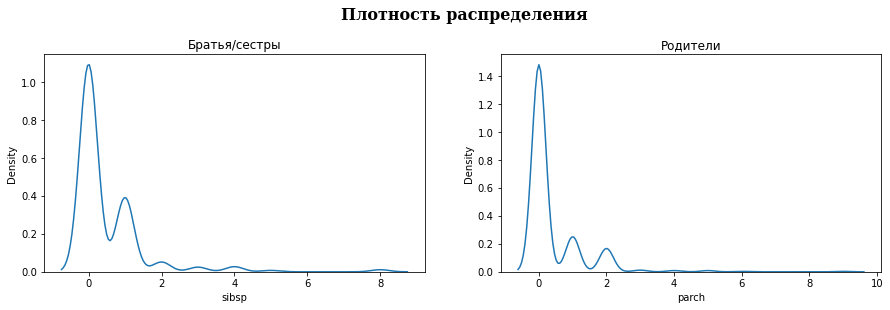

In [18]:
fig, axes = plt.subplots(
    1,               #одной строкой                                           
    2,               #два графика                                       
    figsize=(15, 4)  #вписать в размер 15х4 дюйма                           
)

axes[0].set_title(f'Братья/сестры')
axes[1].set_title(f'Родители')

sns.kdeplot(data = df['sibsp'], ax = axes[0])  
sns.kdeplot(data = df['parch'], ax = axes[1])  

fig.text(0.4,1, 'Плотность распределения', fontweight='bold', fontfamily='serif', fontsize=16);

# 6. Какое самое популярное женское имя на корабле? Извлеките из полного имени пассажира (колонка Name) его личное имя (First Name). Попробуйте вручную разобрать несколько значенийстолбца Name и выработать правило для извлечения имен, а также разделения их на женские и мужские

In [19]:
female_names = df[df['sex'] == 'female']['name']


In [20]:
tmp = female_names.apply(lambda a: a.split(",")[1].split(" ")[2])
tmp.value_counts()

William      16
John         13
Mary         11
Anna          9
Elizabeth     8
             ..
Amin          1
Sinai         1
J             1
Florence      1
Thamine       1
Name: name, Length: 276, dtype: int64

Следовательно, самым популярным именем на Титанике является имя Mary

# 7. Коррелирует ли класс, которым ехал пассажир, с выживаемостью?

In [21]:
from scipy.stats import spearmanr

pclass = df['pclass'].dropna()
survived = df['survived'].dropna()
rho, p =  spearmanr(pclass, survived)


In [22]:
alpha = 0.05
if p < alpha:
    print(f'p-value < {alpha}: Корреляция статистически значима')
else:
    print(f'p-value >= {alpha}: Корреляция статистически незначима')

p-value < 0.05: Корреляция статистически значима


# 8. Визуализируйте гистограммы возраста для выживших и не выживших пассажиров. Сделайте выводы. Отобразите данные на одном и нескольких графиках

<AxesSubplot:xlabel='survived', ylabel='age'>

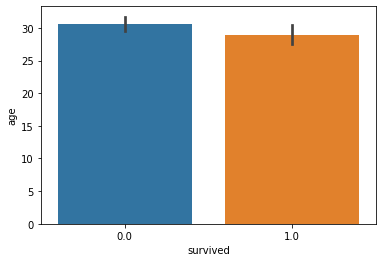

In [23]:
sns.barplot(x="survived", y="age", data=df)

Text(0.5, 1.0, 'Распределение возраста выживших')

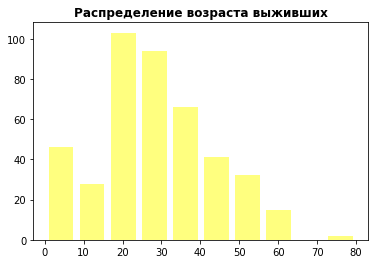

In [24]:
survived_age = df[df['survived'] == 1]['age']
plt.hist(survived_age, color ='yellow', alpha = 0.5, rwidth=0.8)
plt.title('Распределение возраста выживших', fontweight = "bold")


Text(0.5, 1.0, 'Распределение возраста невыживших')

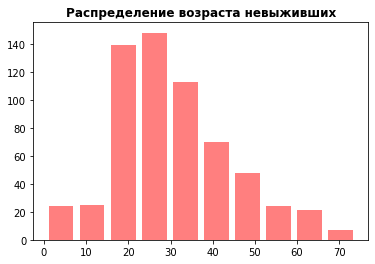

In [25]:
dead_age = df[df['survived'] == 0]['age']
plt.hist(dead_age, color ='red', alpha = 0.5, rwidth=0.8)
plt.title('Распределение возраста невыживших', fontweight = "bold")

Средний возраст выживших меньше, чем невыживших

# 9. Визуализируйте гистограммы возраста для выживших и не выживших пассажиров по классам. Сделайте выводы

<AxesSubplot:xlabel='survived', ylabel='age'>

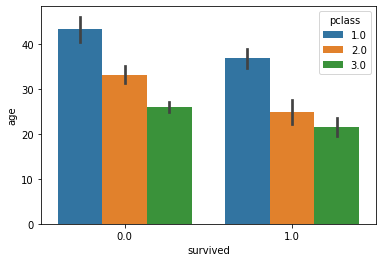

In [26]:
sns.barplot(x = 'survived', y = 'age', hue = 'pclass', data = df)


Возрасты выживших и невышивших по классам отличаются незначительно

# 10. Постройте столбчатую диаграмму количества людей: мужчины, женщины, дети

<AxesSubplot:xlabel='type', ylabel='count'>

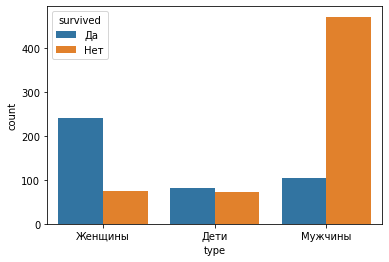

In [27]:
p_type = df[['age','sex', 'survived']].dropna()
p_type.loc[(p_type['age'] >= 18) & (p_type['sex'] == 'male'), 'sex'] = 'Мужчины' 
p_type.loc[(p_type['age'] >= 18) & (p_type['sex'] == 'female'), 'sex'] = 'Женщины' 
p_type.loc[(p_type['age'] < 18), 'sex'] = 'Дети'
p_type.loc[(p_type['survived'] == 0), 'survived'] = 'Нет'
p_type.loc[(p_type['survived'] == 1), 'survived'] = 'Да'
p_type = p_type.rename(columns={'sex':'type'})
sns.countplot(x="type", hue='survived', data=p_type)
